## Installing and Importing Dependencies

In [1]:
!pip install tensorflow pandas numpy matplotlib seaborn kagglehub

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading Dataset

In [3]:
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

100%|██████████| 218M/218M [00:01<00:00, 212MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1


In [4]:
train_path = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set'
test_path = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set'

In [5]:
IMG_HEIGHT, IMG_WIDTH = 224, 224

#### ImageDataGenerator for Image Preprocessing and Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

In [7]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training',
    shuffle = True
)

Found 6404 images belonging to 2 classes.


In [8]:
test_data = train_datagen.flow_from_directory(
    test_path,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False
)

Found 404 images belonging to 2 classes.


## VGG-16 Model

In [9]:
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_vgg16.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model_vgg16 = Sequential([
    base_vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [11]:
model_vgg16.compile(optimizer = Adam(learning_rate = 0.001),
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [12]:
history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data = test_data,
    epochs = 10,
    batch_size = 64
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 114s 504ms/step - accuracy: 0.7741 - loss: 0.7601 - val_accuracy: 0.8812 - val_loss: 0.2674
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 440ms/step - accuracy: 0.8982 - loss: 0.2437 - val_accuracy: 0.9084 - val_loss: 0.2399
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 87s 431ms/step - accuracy: 0.9125 - loss: 0.2182 - val_accuracy: 0.8960 - val_loss: 0.2303
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 442ms/step - accuracy: 0.9199 - loss: 0.1877 - val_accuracy: 0.8911 - val_loss: 0.2802
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 87s 431ms/step - accuracy: 0.9318 - loss: 0.1731 - val_accuracy: 0.8812 - val_loss: 0.2684
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 87s 430ms/step - accuracy: 0.9354 - loss: 0.1562 - val_accuracy: 0.9010 - val_loss: 0.2128
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 436ms/step - accuracy: 0.9376 - loss: 0.1594 - val_accuracy: 0.9035 - val_loss: 0.2262
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 439ms/step - accuracy: 0.9444 - loss: 

#### Evaluation

In [13]:
vgg16_loss, vgg16_acc = model_vgg16.evaluate(test_data)
print("VGG16 Loss     :", vgg16_loss)
print("VGG16 Accuracy :", vgg16_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 622ms/step - accuracy: 0.9392 - loss: 0.1720
VGG16 Loss     : 0.2673551142215729
VGG16 Accuracy : 0.896039605140686


#### Saving Model

In [42]:
model_vgg16.save("VGG16_90_acc.keras")

## Xception Model

In [14]:
base_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_xception.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
model_xception = Sequential([
    base_xception,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [16]:
model_xception.compile(optimizer = Adam(learning_rate = 0.001),
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [19]:
history_xception = model_xception.fit(
    train_data,
    validation_data = test_data,
    epochs = 3,
    batch_size = 64
)

Epoch 1/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 100s 493ms/step - accuracy: 0.9548 - loss: 1.3083 - val_accuracy: 0.9678 - val_loss: 0.9437
Epoch 2/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 86s 427ms/step - accuracy: 0.9801 - loss: 0.3308 - val_accuracy: 0.9777 - val_loss: 0.1426
Epoch 3/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 447ms/step - accuracy: 0.9861 - loss: 0.0465 - val_accuracy: 0.9752 - val_loss: 0.2576


#### Evaluation

In [41]:
xception_loss, xception_acc = model_xception.evaluate(test_data)
print("Xception Loss     :", xception_loss)
print("Xception Accuracy :", xception_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 0.9603 - loss: 0.2626
Xception Loss     : 0.1757226288318634
Xception Accuracy : 0.9727723002433777


#### saving Model

In [43]:
model_xception.save("Xception_97_acc.keras")

## Comparative Analysis

#### Trasforming History of Models to DataFrame

In [25]:
vgg16 = pd.DataFrame(history_vgg16.history)
vgg16['epoch'] = vgg16.index + 1

In [39]:
his_xception = pd.DataFrame(history_xception.history)
his_xception['epoch'] = his_xception.index + 1

#### Plotting Model Histories

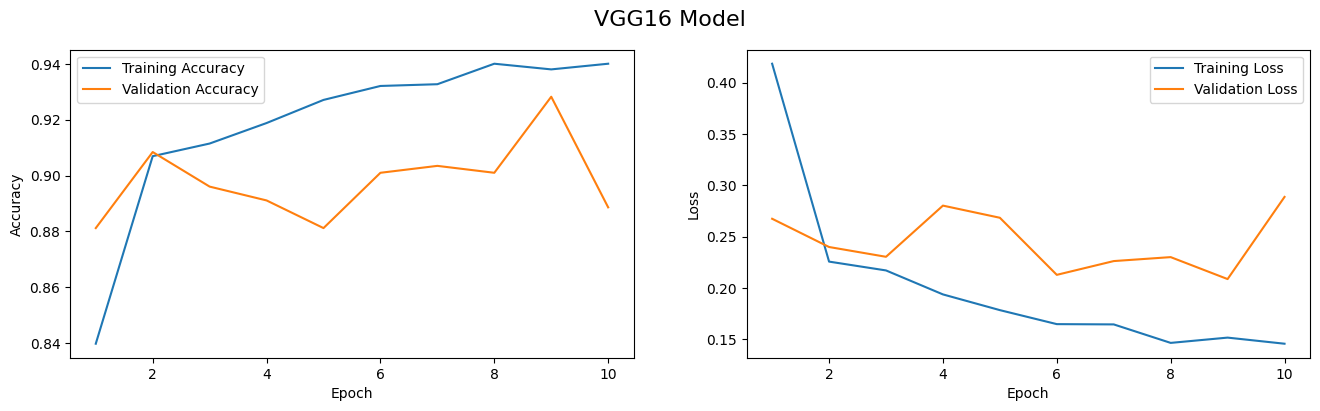

In [38]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data = vgg16, x = 'epoch', y = 'accuracy', label = 'Training Accuracy')
sns.lineplot(data = vgg16, x = 'epoch', y = 'val_accuracy', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data = vgg16, x = 'epoch', y = 'loss', label = 'Training Loss')
sns.lineplot(data = vgg16, x = 'epoch', y = 'val_loss', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('VGG16 Model', fontsize = 16)
plt.show()

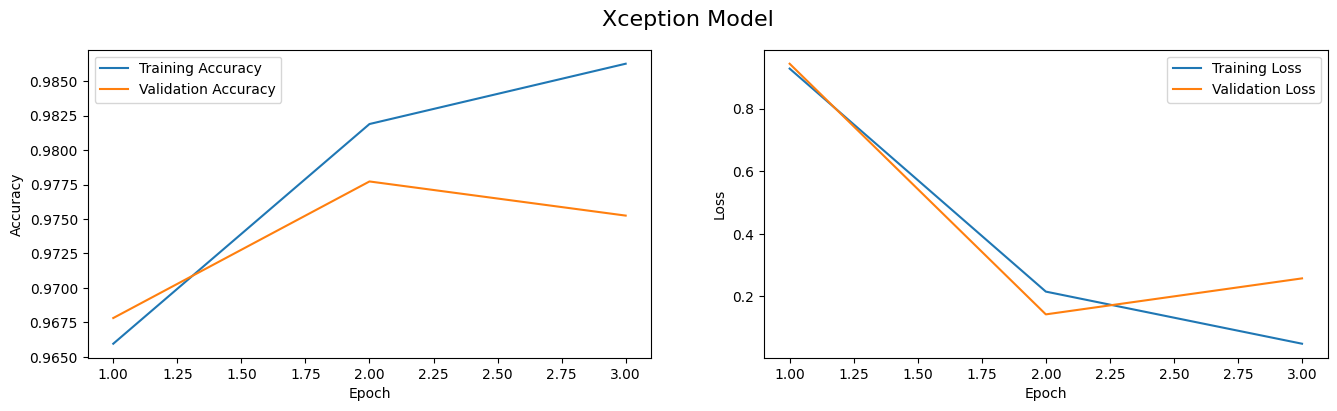

In [40]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data = his_xception, x = 'epoch', y = 'accuracy', label = 'Training Accuracy')
sns.lineplot(data = his_xception, x = 'epoch', y = 'val_accuracy', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data = his_xception, x = 'epoch', y = 'loss', label = 'Training Loss')
sns.lineplot(data = his_xception, x = 'epoch', y = 'val_loss', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Xception Model', fontsize = 16)
plt.show()

#### Analysis Of Accuracy and Loss

In [44]:
print("VGG16 Loss        :", vgg16_loss)
print("VGG16 Accuracy    :", vgg16_acc)
print('*' * 50)
print("Xception Loss     :", xception_loss)
print("Xception Accuracy :", xception_acc)

VGG16 Loss        : 0.2673551142215729
VGG16 Accuracy    : 0.896039605140686
**************************************************
Xception Loss     : 0.1757226288318634
Xception Accuracy : 0.9727723002433777


###### Although VGG16 is trained for 10 epochs and Xception for only 3 epochs, still Xception Model has 97.3% accuracy and VGG16 Model has 89.6% accuracy. that shows that Xception Model is better and it generalizes better than VGG16